In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import env
import os

from matplotlib import style

from wrangle import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = wrangle_zillow()

In [3]:
df.to_csv('zillow.csv',index=False)

In [4]:
train, validate, test = train_validate_test_split(df)

In [5]:
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
42186,2.0,4.0,8.0,2064.0,6037.0,34017722.0,-117851610.0,8025.0,6.037403e+07,34636.0,...,1964.0,284087.0,644943.0,2016.0,360856.0,7528.65,-0.005855,2017-06-01,Central,Los Angeles
17405,2.0,4.0,6.0,1920.0,6059.0,33895330.0,-117879284.0,7632.0,6.059012e+07,24812.0,...,1962.0,100450.0,462860.0,2016.0,362410.0,5301.98,0.062575,2017-03-16,Forced air,Orange
15241,2.0,3.0,6.0,1425.0,6037.0,33871501.0,-118383982.0,2503.0,6.037621e+07,33612.0,...,1973.0,52753.0,86273.0,2016.0,33520.0,1573.60,0.042117,2017-03-08,Central,Los Angeles
22227,1.0,2.0,4.0,838.0,6037.0,34216523.0,-118443856.0,6047.0,6.037120e+07,12447.0,...,1949.0,71787.0,164570.0,2016.0,92783.0,2052.88,-0.009249,2017-03-31,Floor/Wall,Los Angeles
76503,2.0,2.0,6.0,935.0,6059.0,33715500.0,-118050000.0,7313.0,6.059099e+07,25218.0,...,1983.0,87847.0,392467.0,2016.0,304620.0,4561.14,0.005929,2017-09-14,None,Orange


In [6]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'heatingorsystemdesc', 'county'],
      dtype='object')

In [7]:
train['county'] = train['county'].replace(['Orange'],'Orange County')
train['county'] = train['county'].replace(['Ventura'],'Ventura County')


### Is logerror significantly different for properties in LA Country vs Orange County vs Ventura County?

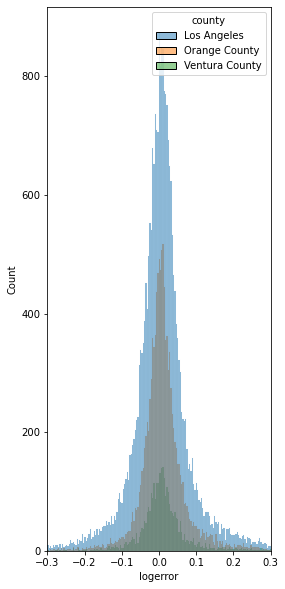

In [8]:
plt.figure(figsize=(4,10))
sns.histplot(data=train, x='logerror', hue='county')
plt.xlim(-.3,.3)
plt.show()

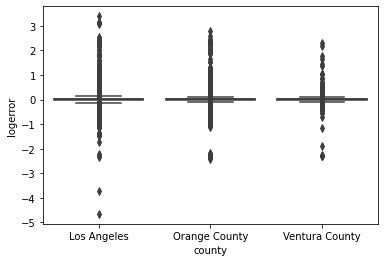

In [9]:
sns.boxplot(data=train, x='county', y='logerror')
plt.show()

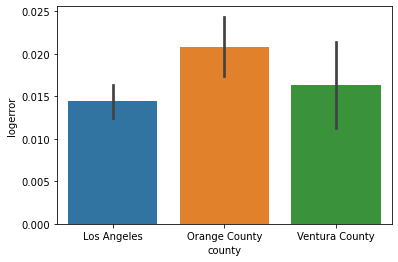

In [10]:
sns.barplot(data=train,y='logerror',x='county')
plt.show()

In [11]:
train.county.value_counts()

Los Angeles       26536
Orange County     11833
Ventura County     3344
Name: county, dtype: int64

In [12]:
train[train.county=='Orange'].logerror.mean()

nan

In [13]:
train[train.county=='Ventura'].logerror.mean()

nan

In [14]:
train[train.county=='Los Angeles'].logerror.mean()

0.014436706453077597

#### Hypothesis testing
- $H_0$: the means of logerror have no variation between the three counties
- $H_a$: the means of logerror do have variation between the three counties

need to do stats test ^^^

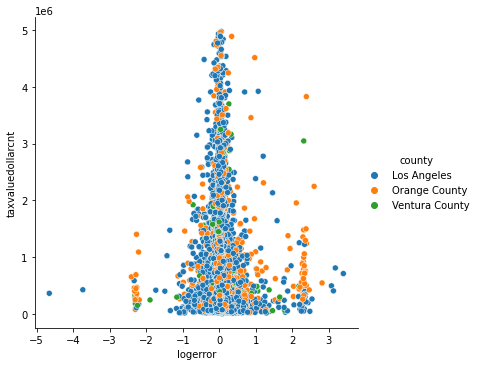

In [15]:
sns.relplot(data=train, y='taxvaluedollarcnt', x='logerror', hue='county')
plt.show()

In [17]:
train.to_csv('zillow_train.csv',index=False)

### Does the logerror change based on the assessed quality of the building?

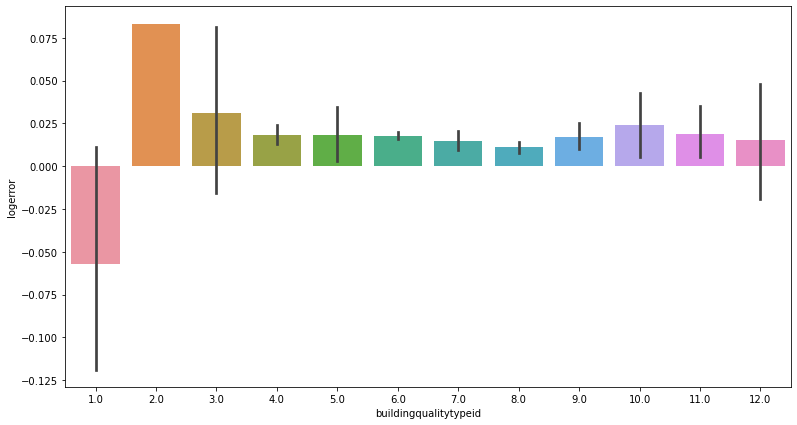

In [36]:
plt.figure(figsize = (13,7))
sns.barplot(data=train,y='logerror',x='buildingqualitytypeid')
plt.show()

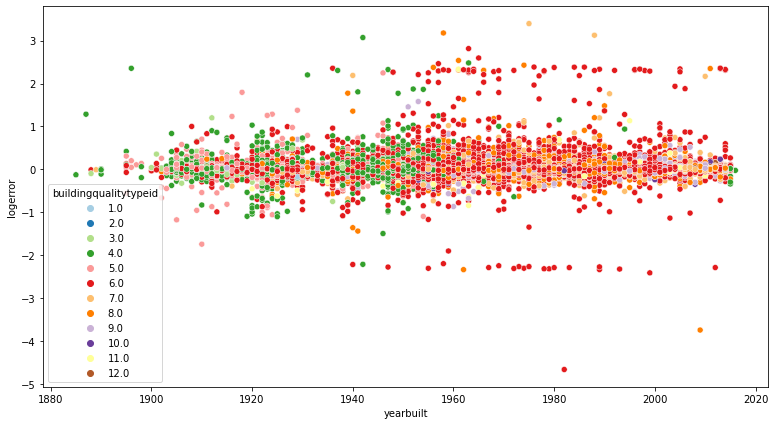

In [18]:
plt.figure(figsize = (13,7))
sns.scatterplot(data=train, x='yearbuilt', y='logerror', hue='buildingqualitytypeid',palette="Paired")
plt.show()

**Takeaways**
- a lot of 4.0 in the first half and 6.0 in the second
- It looks like the log error increases as the years go on....we notice the two clusters of (2,-2) starting around 1940

In [32]:
train.buildingqualitytypeid.value_counts()

6.0     23000
8.0      7799
4.0      4886
7.0      3140
9.0      1238
5.0       897
11.0      469
10.0      142
3.0        87
12.0       51
1.0         3
2.0         1
Name: buildingqualitytypeid, dtype: int64

In [27]:
train['yearbuilt_bin'] = pd.cut(train.yearbuilt, [1880,1920,1960,2000,2020])

### Does the logerror change as 'yearbuilt' increases?

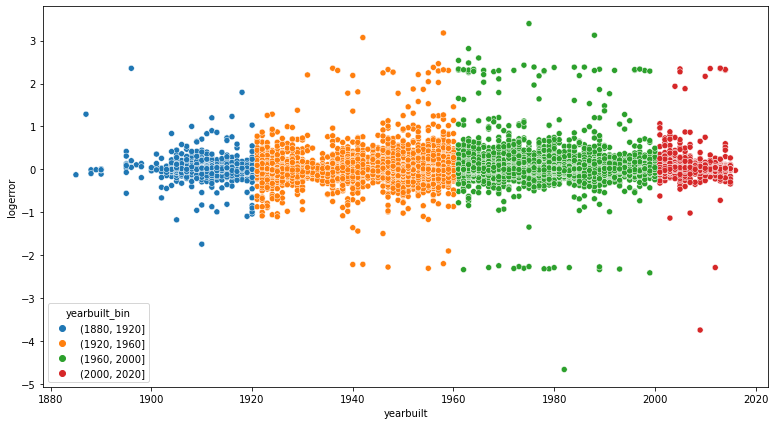

In [30]:
plt.figure(figsize = (13,7))
sns.scatterplot(data=train, x='yearbuilt', y='logerror',hue='yearbuilt_bin')
plt.show()

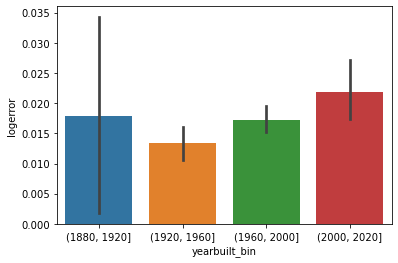

In [31]:
sns.barplot(data=train,y='logerror',x='yearbuilt_bin')
plt.show()

In [42]:
from scipy.stats import f_oneway
f_oneway(*[x for year, x in train.groupby('yearbuilt_bin').logerror])

F_onewayResult(statistic=3.1984888577728374, pvalue=0.022347225773949965)

In [53]:
from scipy.stats import kruskal
kruskal(*[x for year, x in train.groupby('yearbuilt_bin').logerror])

KruskalResult(statistic=75.09523648581465, pvalue=3.456963315627406e-16)

#### Hypothesis testing
- $H_0$: the means of logerror are not statistically different between bins of year built
- $H_a$: the means of logerror are statistically different between bins of year built

##### We reject the null hypothesis, evidence shows that means are statistically different

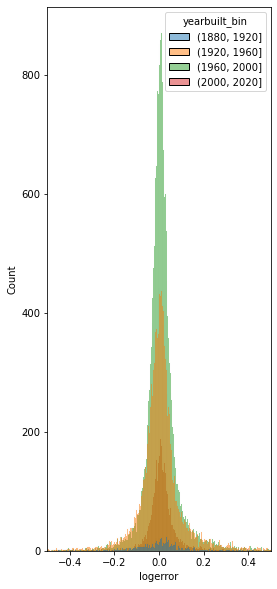

In [54]:
# Checking the distribution
plt.figure(figsize=(4,10))
sns.histplot(data=train, x='logerror', hue='yearbuilt_bin')
plt.xlim(-.5,.5)
plt.show()